In [196]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, linregress

date_min = '2019-01-01'
date_max = '2019-11-15'
last_drm = "2019-10"

In [197]:
dispo = pd.read_csv("http://10.222.223.1/stats/disponibilite_ping.csv", encoding='utf-8', sep=';')
dispo = dispo.dropna()
dispo.index = pd.to_datetime(dispo['date'])
dispo = dispo[dispo.index >= date_min]
dispo = dispo[dispo.index <= date_max]

In [198]:
indispo = 60 - dispo[['nb de ping']].resample('H').sum()
indispo = indispo.resample('D').sum()
indispo = indispo[indispo["nb de ping"] > 0]
indispo = indispo[(indispo.index < '2019-07-01') ^ (indispo.index > '2019-07-07')]
indispo = indispo[(indispo.index < '2019-09-17') ^ (indispo.index > '2019-09-30')]
indispo = indispo.rename(columns={"nb de ping": "indisponibilite"})
#indispo


# Nombre de jours d'indispo

In [199]:
nb_jours_indispo = indispo
nb_jours_indispo.describe()

,indisponibilite
count,51.000000
mean,629.058824
std,659.202986
min,1.000000
25%,1.000000
50%,350.000000
75%,1440.000000
max,1440.000000


# Indisponibilité durant les périodes de déclaration

In [200]:
indispo_periodes = indispo
indispo_periodes["jours du mois"] = indispo_periodes.index
indispo_periodes["jours du mois"] = indispo_periodes["jours du mois"].apply(lambda a: a.day)
indispo_periode = indispo_periodes[indispo_periodes["jours du mois"] < 11][["indisponibilite"]].rename(columns={"indisponibilite": "indisponibilite periode"})
indispo_non_periode = indispo_periodes[indispo_periodes["jours du mois"] > 10][["indisponibilite"]].rename(columns={"indisponibilite": "indisponibilite hors periode"})

indispo_periode[["indisponibilite periode"]].describe()

,indisponibilite periode
count,24.000000
mean,893.416667
std,675.502513
min,1.000000
25%,9.000000
50%,1440.000000
75%,1440.000000
max,1440.000000


In [201]:
indispo_periodes = pd.concat([indispo_periode, indispo_non_periode], sort=True)
indispo_mensuelles = indispo_periodes.resample('M').sum()
indispo_mensuelles["indisponibilite totale"] = indispo_mensuelles["indisponibilite hors periode"] + indispo_mensuelles["indisponibilite periode"]
indispo_mensuelles["mois"] = ["janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre"]
indispo_mensuelles = indispo_mensuelles.reset_index()
indispo_mensuelles

,date,indisponibilite hors periode,indisponibilite periode,indisponibilite totale,mois
0,2019-01-31,9.0,3.0,12.0,janvier
1,2019-02-28,7.0,0.0,7.0,février
2,2019-03-31,231.0,11.0,242.0,mars
3,2019-04-30,3.0,0.0,3.0,avril
4,2019-05-31,0.0,6459.0,6459.0,mai
5,2019-06-30,368.0,0.0,368.0,juin
6,2019-07-31,1829.0,564.0,2393.0,juillet
7,2019-08-31,4.0,1.0,5.0,août
8,2019-09-30,1.0,2.0,3.0,septembre
9,2019-10-31,8188.0,14400.0,22588.0,octobre


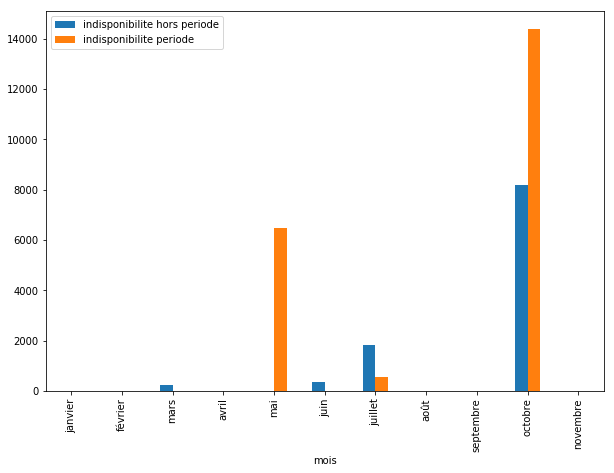

In [202]:
indispo_mensuelles[["mois", "indisponibilite hors periode", "indisponibilite periode"]].plot(kind='bar', x="mois", figsize=[10, 7]) #.

In [203]:
indispo_periodes.resample('D').sum().sort_values("indisponibilite hors periode", ascending=False)

,indisponibilite hors periode,indisponibilite periode
date,,
2019-10-11,1440.0,0.0
2019-10-12,1440.0,0.0
2019-10-13,1440.0,0.0
2019-10-14,1440.0,0.0
2019-10-15,1440.0,0.0
2019-07-23,758.0,0.0
2019-10-16,745.0,0.0
2019-07-15,556.0,0.0
2019-07-22,462.0,0.0


# La transmission par intepro

In [204]:
interpros = pd.read_csv("http://10.222.223.1/stats/DRMInterpro.csv", encoding='utf-8', sep=';')
#interpros = interpros.dropna()
interpros = interpros[interpros["date"] <= last_drm]

In [221]:
global_drm = interpros[["date", "nb DRM"]].groupby(by="date").sum()
global_drm = global_drm[global_drm.index >= date_min]
global_drm

,nb DRM
date,
2019-02,7756
2019-03,8429
2019-04,9081
2019-05,9900
2019-06,10839
2019-07,11671
2019-08,14364
2019-09,14419
2019-10,14167


In [217]:
global_drm.sum()

nb DRM    100626
dtype: int64

In [206]:
global_drm.max()

nb DRM    14419
dtype: int64

In [207]:
global_drm.mean()

nb DRM    11180.666667
dtype: float64

Text(0.5, 0, 'période de DRM (février à octobre)')

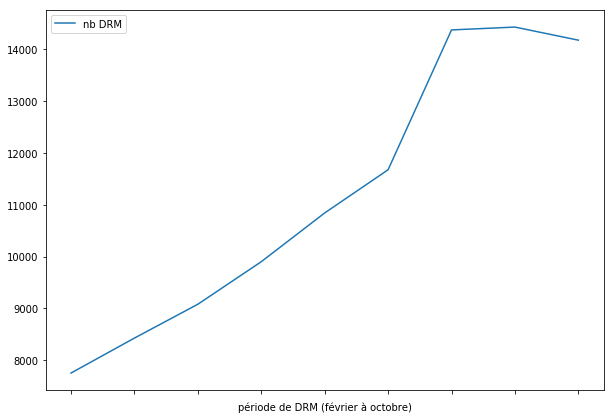

In [225]:
fig = global_drm.plot(figsize=[10, 7])
fig.set_xlabel('période de DRM (février à octobre)')

In [209]:
les_interpros = interpros[["date", 'interpro nom', "nb DRM"]].groupby(["date", 'interpro nom']).sum().sort_values(by=["date", "nb DRM"], ascending=False).reset_index()
les_interpros[les_interpros["date"] == last_drm][["interpro nom", "nb DRM"]]

,interpro nom,nb DRM
0,BIVB,2798
1,InterLoire,2178
2,InterRhone,1873
3,CIVL,1463
4,Inter Beaujolais,1232
5,IVSO,1031
6,CIVA,866
7,CIVP,685
8,Oc,639
9,CIVR,495


In [210]:
les_prestas = interpros[["date", 'prestataire', "nb DRM"]].groupby(["date", 'prestataire']).sum().sort_values(by=["date", "nb DRM"]).reset_index()
les_prestas[les_prestas["date"] == last_drm][["prestataire", "nb DRM"]]

,prestataire,nb DRM
141,ITMG,1
142,RMSI,1232
143,Infodial,2597
144,Estalis,2798
145,24ème,7539


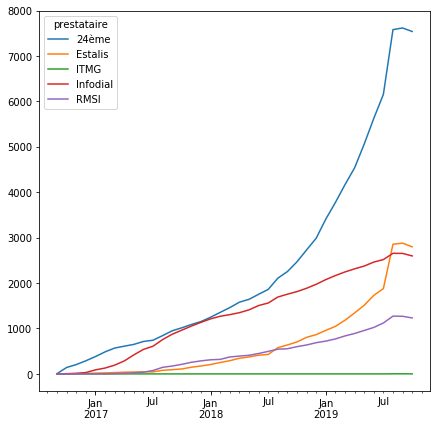

In [211]:
les_prestas.index = les_prestas.index = pd.to_datetime(les_prestas['date'].rename(colums={"date": "datindex"}))
les_prestas[["prestataire", "nb DRM"]].pivot(columns='prestataire', values='nb DRM').fillna(0).plot(figsize=[7, 7])

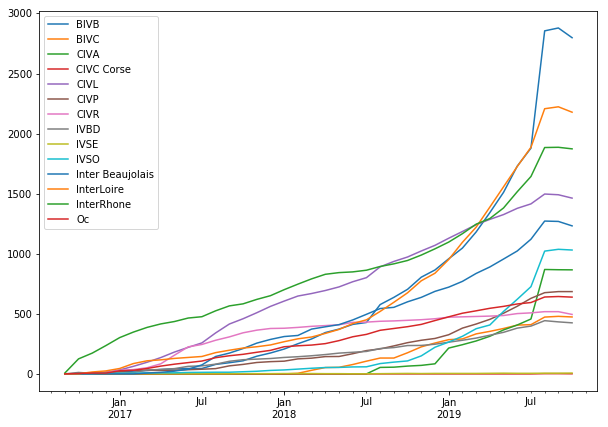

In [212]:
les_interpros.index = les_interpros.index = pd.to_datetime(les_interpros['date'].rename(colums={"date": "datindex"}))
graph = les_interpros[["interpro nom", "nb DRM"]].pivot(columns='interpro nom', values='nb DRM').fillna(0).plot(legend=False, figsize=[10, 7])
patches, labels = graph.get_legend_handles_labels()
graph.legend(patches, labels, loc='best')


In [213]:
les_interpros

,date,interpro nom,nb DRM
2019-10-01,2019-10,BIVB,2798
2019-10-01,2019-10,InterLoire,2178
2019-10-01,2019-10,InterRhone,1873
2019-10-01,2019-10,CIVL,1463
2019-10-01,2019-10,Inter Beaujolais,1232
2019-10-01,2019-10,IVSO,1031
2019-10-01,2019-10,CIVA,866
2019-10-01,2019-10,CIVP,685
2019-10-01,2019-10,Oc,639
2019-10-01,2019-10,CIVR,495


# Les transferts réalisés par les douanes

In [214]:
transfert = pd.read_csv("http://10.222.223.1/stats/DRMjour.csv", encoding='utf-8', sep=';')
transfert.index = pd.to_datetime(transfert['date'].rename(colums={"date": "datindex"}))
transfert = transfert[transfert.index >= date_min]
transfert = transfert.pivot(columns="action", values="nb")
transfert.head()


action,XML créés,archives reçues
2019-01-01,49.0,10.0
2019-01-02,63.0,12.0
2019-01-03,359.0,12.0
2019-01-04,434.0,12.0
2019-01-05,454.0,12.0


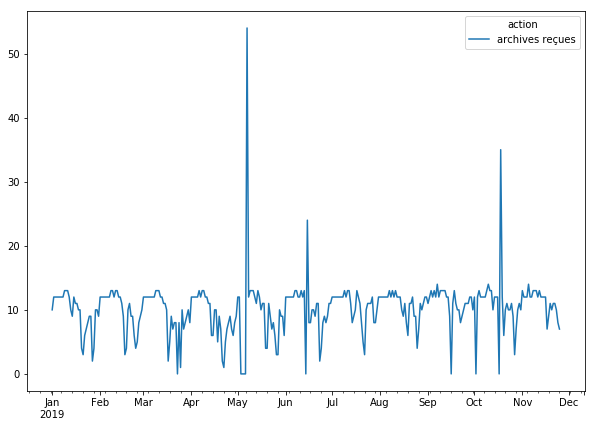

In [215]:
transfert[["archives reçues"]].resample("D").sum().plot(figsize=[10, 7])

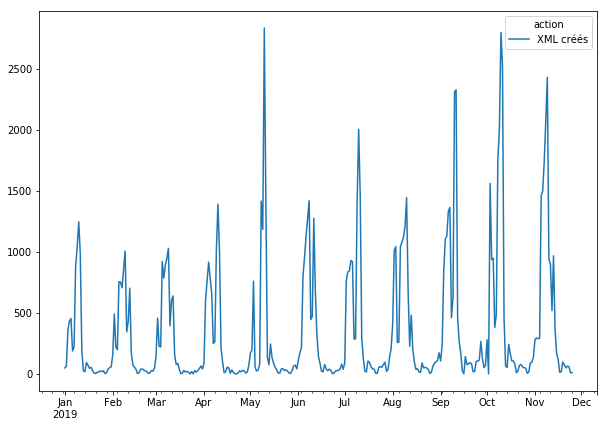

In [47]:
transfert[["XML créés"]].resample("D").sum().plot(figsize=[10, 7])

# DRM réémises

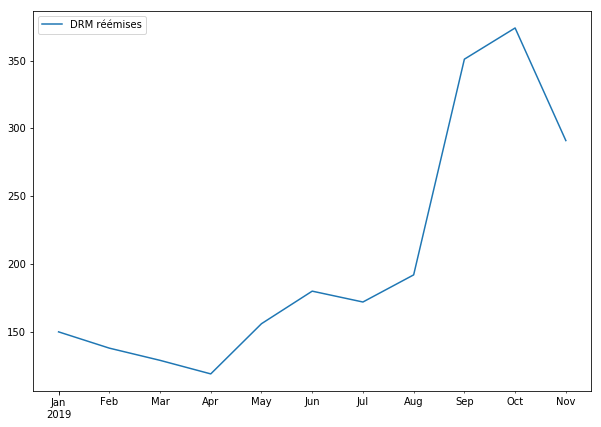

In [58]:
reemission = pd.read_csv("http://10.222.223.1/stats/DRMreemises.csv", encoding='utf-8', sep=';')
reemission.index = pd.to_datetime(reemission['date reemission'].rename(colums={"date reemission": "datindex"}))
reemission = reemission[reemission.index >= date_min]
reemission.resample("M")[["interpro"]].count().rename(columns={"interpro": "DRM réémises"}).plot(figsize=[10, 7])
#reemission

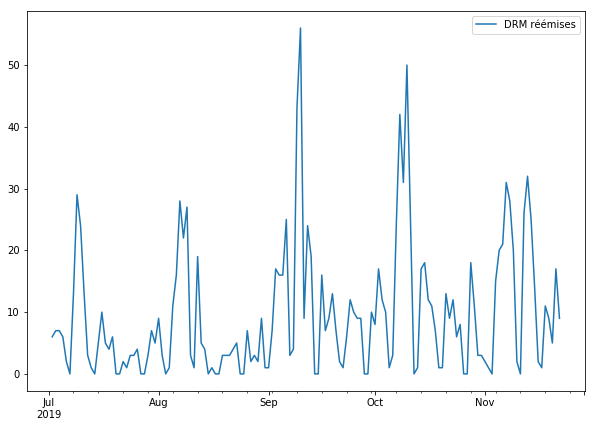

In [60]:
reemission[reemission.index > "2019-07-01"].resample("D")[["interpro"]].count().rename(columns={"interpro": "DRM réémises"}).plot(figsize=[10, 7])


In [61]:
reemission[reemission.index > "2019-07-01"].resample("D")[["interpro"]].count().rename(columns={"interpro": "DRM réémises"}).sort_values("DRM réémises", ascending=False)

,DRM réémises
2019-09-10,56
2019-10-10,50
2019-09-09,43
2019-10-08,42
2019-11-13,32
2019-11-07,31
2019-10-09,31
2019-07-09,29
2019-08-07,28
2019-11-08,28


# Jours d'envoi des DRM 

In [62]:
reception = pd.read_csv("http://10.222.223.1/stats/DRMpremiererecues.csv", encoding='utf-8', sep=';')
reception['date 1ere reception'] = pd.to_datetime(reception['date 1ere reception'].rename(colums={"date 1ere reception": "datindex"}))
#reception.index = reception['date 1ere reception']
reception = reception[(reception['mois drm'] <= "2018-07") & (reception['mois drm'] > "2016-09")]
reception["jour du mois de reception"] = reception["date 1ere reception"].apply(lambda a: a.day)
reception["jour de la semaine de reception"] = reception["date 1ere reception"].apply(lambda a: a.dayofweek)


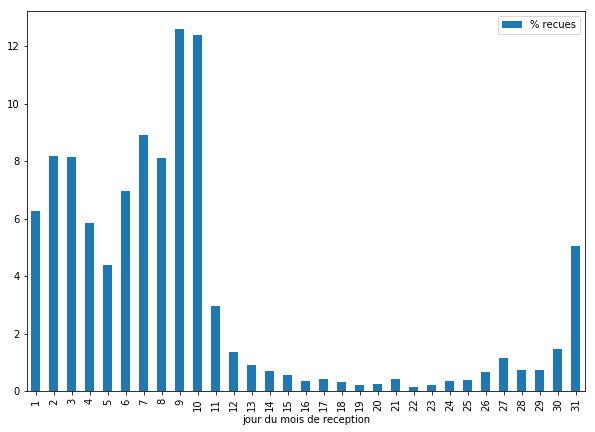

In [63]:
ratio_recues = reception.groupby(by=["mois drm", "jour du mois de reception"]).count()[["interpro"]].rename(columns={"interpro": "% recues"})
ratio_recues = ratio_recues * 100 / ratio_recues.groupby(by='mois drm').sum()
ratio_recues = ratio_recues.reset_index().groupby(by='jour du mois de reception').median()
ratio_recues.plot(kind='bar', figsize=[10, 7])

In [64]:
ratio_recues.sort_values("% recues", ascending=False)

,% recues
jour du mois de reception,
9,12.613636
10,12.397541
7,8.911221
2,8.191438
3,8.143773
8,8.096536
6,6.958067
1,6.265728
4,5.846470


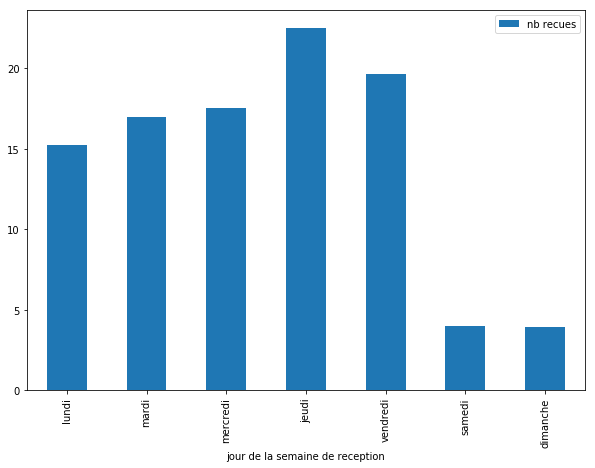

In [65]:
ratio_recues_jour = reception.groupby(by=["mois drm", "jour de la semaine de reception"]).count()[["interpro"]].rename(columns={"interpro": "nb recues"})
ratio_recues_jour = ratio_recues_jour * 100 / ratio_recues_jour.groupby(by='mois drm').sum()
ratio_recues_jour = ratio_recues_jour.reset_index().groupby(by='jour de la semaine de reception').median().reset_index()
ratio_recues_jour['jour de la semaine de reception'] = ["lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]
ratio_recues_jour.index = ratio_recues_jour["jour de la semaine de reception"]
ratio_recues_jour = ratio_recues_jour[["nb recues"]]
ratio_recues_jour.plot(kind='bar',figsize=[10, 7])

In [66]:
ratio_recues_jour

,nb recues
jour de la semaine de reception,
lundi,15.247695
mardi,16.981335
mercredi,17.526060
jeudi,22.496229
vendredi,19.632219
samedi,4.022580
dimanche,3.938669
